<a href="https://colab.research.google.com/github/Ultan-Kearns/ZTM-Tensorflow-Developer-Certificate/blob/master/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regresion with Neural Networks in Tensorflow
There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter predicting a number

In [1]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

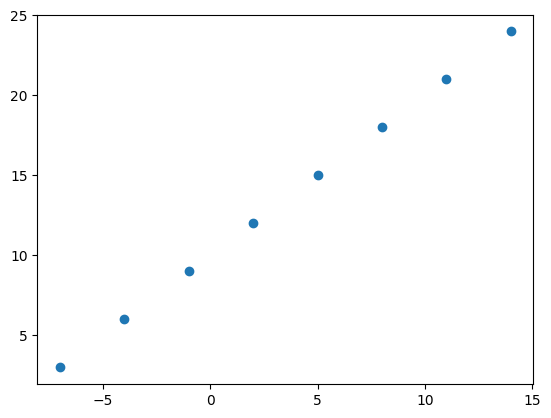

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
# create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

plt.scatter(X,y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
X[0], y[0]

(-7.0, 3.0)

In [5]:
X[1],y[1]

(-4.0, 6.0)

In [6]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
X[0],y[0]

(-7.0, 3.0)

In [11]:
# Turn numpy arrays into tensors
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)
X,y.shape


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 TensorShape([8]))

In [12]:
input_shape = X[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

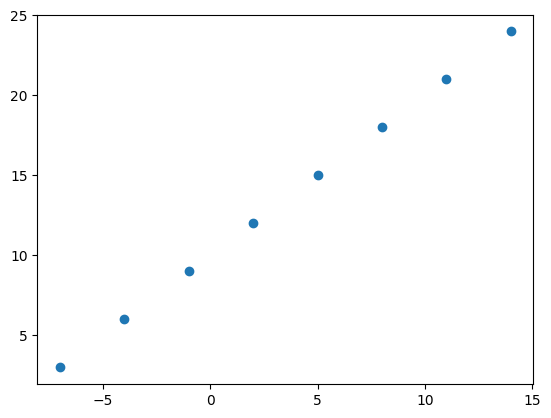

In [13]:
plt.scatter(X,y)

## Steps in modelling with tensorflow
1. Creating a model - define input and output  layers as well as hidden layers of model
2. Compiling a model - define loss function(tells how wrong model is) and the optimizer(improves model and tells us how to improve) evaluation metrics(gauges how well model performs)
3. Fitting the model(where model learns patterns in data)

In [14]:
tf.random.set_seed(42)

In [15]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

In [16]:
# 1. Create a model using sequential API(specified to problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# 2. compile model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=["mae"]) # mean absolute error
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line


Epoch 1/5
1/1 [==============================] - 1s 790ms/step - loss: 13.7876 - mae: 13.7876
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 13.6551 - mae: 13.6551
Epoch 3/5
1/1 [==============================] - 0s 21ms/step - loss: 13.5226 - mae: 13.5226
Epoch 4/5
1/1 [==============================] - 0s 16ms/step - loss: 13.3901 - mae: 13.3901
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 13.2576 - mae: 13.2576


In [17]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
y_pred = model.predict([11.0])
y_pred

1/1 [==============================] - 0s 356ms/step


array([[1.0710275]], dtype=float32)

## Improving our model
We can improve our model, by altering the steps we took to create the model

1. creating a model - here we might add more layers, increase hidden units within each hidden layer, change activation func of layers
2. compiling a model - here we might change optimization function or perhaps the learning rate of the optimization function
3. fitting a model - here we might fit a model for more epochs or on more data

In [19]:
# 1. Create a model using sequential API(specified to problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# 2. compile model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=["mae"]) # mean absolute error
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated line


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 17.9516 - mae: 17.9516
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 17.6703 - mae: 17.6703
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 17.3891 - mae: 17.3891
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 17.1078 - mae: 17.1078
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 16.8266 - mae: 16.8266
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 16.5453 - mae: 16.5453
Epoch 7/100
1/1 [==============================] - 0s 44ms/step - loss: 16.2641 - mae: 16.2641
Epoch 8/100
1/1 [==============================] - 0s 54ms/step - loss: 15.9828 - mae: 15.9828
Epoch 9/100
1/1 [==============================] - 0s 41ms/step - loss: 15.7016 - mae: 15.7016
Epoch 10/100
1/1 [==============================] - 0s 40ms/step - loss: 15.4203 - mae: 15.4203
Epoch 11/100
1/1 [==============================] -

In [20]:
# Lets see if pred has improved
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 119ms/step


array([[29.57435]], dtype=float32)

In [21]:
# 1. Create a model using sequential API(specified to problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1),
])
# 2. compile model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["mae"]) # mean absolute error
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated line


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.6545 - mae: 13.6545
Epoch 2/100
1/1 [==============================] - 0s 29ms/step - loss: 12.9514 - mae: 12.9514
Epoch 3/100
1/1 [==============================] - 0s 33ms/step - loss: 12.2380 - mae: 12.2380
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 11.5137 - mae: 11.5137
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 10.7776 - mae: 10.7776
Epoch 6/100
1/1 [==============================] - 0s 33ms/step - loss: 10.0281 - mae: 10.0281
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 9.2630 - mae: 9.2630
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 8.4799 - mae: 8.4799
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 7.6758 - mae: 7.6758
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 6.8481 - mae: 6.8481
Epoch 11/100
1/1 [==============================] - 0s 31ms

In [22]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [23]:
# Lets see if pred has improved
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 251ms/step


array([[25.868984]], dtype=float32)

## Evaluating a model
In practice, a typical workflow you'll go through when building a neural network is:

``` build a model -> fit it -> evaluate it -> tweak a model -> evaluate it -> repeat

When it comes to evaluation experiment experiment experiment
When it comes to evaluation it's
> visualization, visualization, visualization
It's a good idea to visualize
* The data - imagine what it looks like
* The model itself - what does our model look like?
* The training of a model - how does model perform while it learns?
* The predictions of the model - how do predictions line up with the ground truth

In [24]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# Make labels for the datase
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

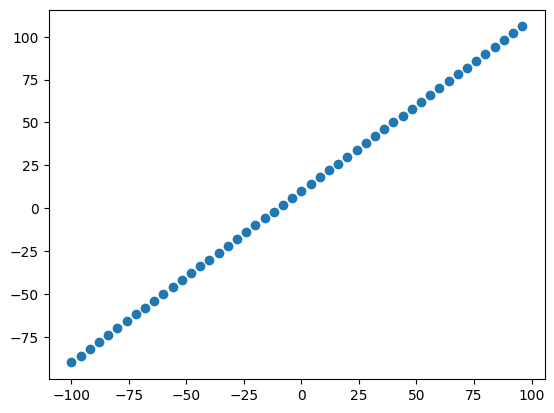

In [26]:
# visualize the data
plt.scatter(X,y)

### The 3 sets....

* **Training** - the model used to train the data, usually 70 - 80 % of the total amount of data
* **Validation** - Used to validate how well the model performs usually around 10% of the total available data
* **Test** - provides an unbiased account of how well the model is performing usually 10 - 15 % of the total available data

We want the model to be able to generalize - performs well on data which the model hasn't seen before and learns generalised patterns within the data

In [27]:
# Check the length of how many samples we have
len(X)

50

In [28]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now we've got the data in training and test sets... let's visualize it again!

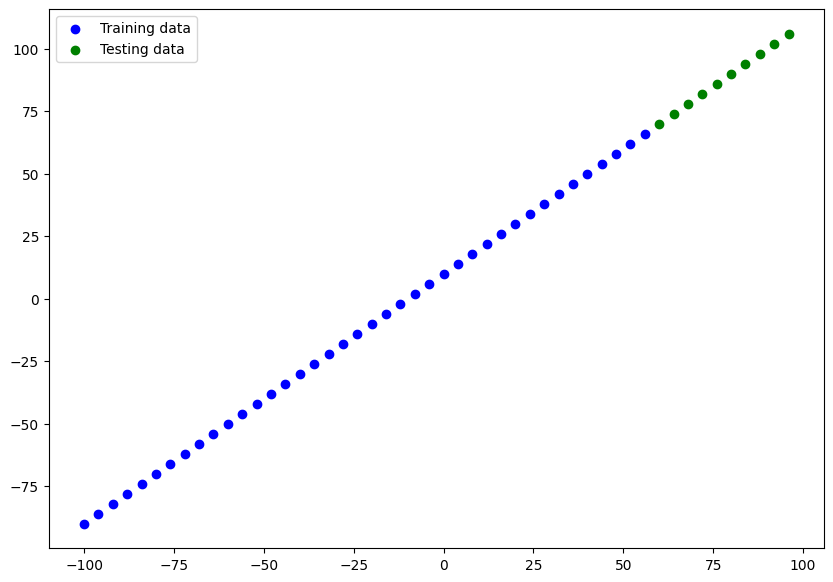

In [29]:
plt.figure(figsize=(10,7))

# plot the training data in blue
plt.scatter(X_train,y_train, c='b',label="Training data")
plt.scatter(X_test, y_test, c="g",label=("Testing data"))
plt.legend()

# Let's have a look at how to build a neural network with our data

In [30]:
# 1. Create a model using sequential API(specified to problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
# 2. compile model
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=["mae"]) # mean absolute error
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated line


Epoch 1/100
2/2 [==============================] - 2s 16ms/step - loss: 23.0975 - mae: 23.0975
Epoch 2/100
2/2 [==============================] - 0s 19ms/step - loss: 11.6401 - mae: 11.6401
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 11.5121 - mae: 11.5121
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 10.1821 - mae: 10.1821
Epoch 5/100
2/2 [==============================] - 0s 19ms/step - loss: 13.1239 - mae: 13.1239
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 13.7642 - mae: 13.7642
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 10.4353 - mae: 10.4353
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 11.6497 - mae: 11.6497
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 9.8838 - mae: 9.8838
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 9.9303 - mae: 9.9303
Epoch 11/100
2/2 [==============================] - 0

# Visualizing the model

In [31]:
model.build()

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [34]:
# let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)
# create a model same as above
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,name="output_layer")
], name="One_of_the_many_models_we_will_build")
# compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),metrics=["mae"])
#fit the model
model.summary()

Model: "One_of_the_many_models_we_will_build"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* **Total parameters** - total nums of parameters in the model
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains
* **Non-trainable params** - these parameters aren't updated during training(this usually occurs during transfer learning)

** Resource ** For more in depth overview of trainable parameters within a layer checkout MIT's intro to deep-learning video http://introtodeeplearning.com/

In [35]:
# lets fit our model to the training data
model.fit(X_train,y_train, epochs=100, verbose=0)

In [36]:
model.summary()

Model: "One_of_the_many_models_we_will_build"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Visualizing the model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test`or `y_true`vs `y_pred`(ground truth versus models prediction's)

In [37]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 76ms/step


array([[ 73.2611  ],
       [ 78.104546],
       [ 82.94797 ],
       [ 87.79141 ],
       [ 92.63484 ],
       [ 97.47828 ],
       [102.321724],
       [107.16515 ],
       [112.008575],
       [116.85202 ]], dtype=float32)

In [38]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note** if you feel like you're going to reuse a piece of code turn it into function

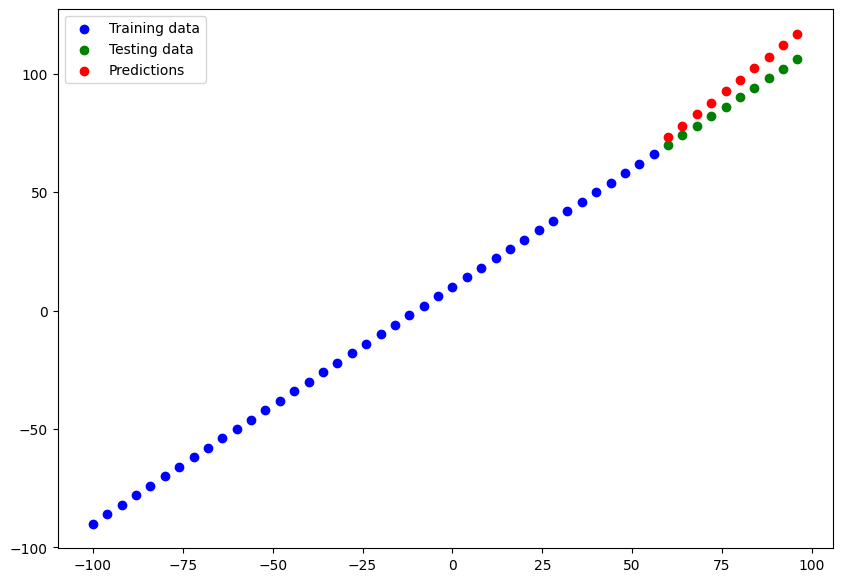

In [39]:
# let's create a plotting function
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_pred):
  """
  Plots training data, test data, and compares predictions to ground truth
  """
  plt.figure(figsize=[10,7])
  # Training data
  plt.scatter(train_data,train_labels,c="blue",label="Training data")
  # Test data
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  # plot predictions
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  plt.legend()
plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test, predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.  

Since we're working on regression problems, two of the main metrics we will use are:

* MAE - mean absolute error: on average, how wrong are our predictions
* MSE - mean squared error: square of average errors

In [40]:
# Evaluate the model on the test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 277ms/step - loss: 7.0566 - mae: 7.0566


[7.0565619468688965, 7.0565619468688965]

In [41]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.constant(y_pred))
print(mae)

tf.Tensor(
[15.391119 12.358182 10.610407 10.       10.526968 12.191312 15.057379
 19.165154 24.008575 28.85202 ], shape=(10,), dtype=float32)


In [42]:
y_pred

array([[ 73.2611  ],
       [ 78.104546],
       [ 82.94797 ],
       [ 87.79141 ],
       [ 92.63484 ],
       [ 97.47828 ],
       [102.321724],
       [107.16515 ],
       [112.008575],
       [116.85202 ]], dtype=float32)

In [43]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [44]:
# needed to be done for both mae and mse as they weren't of the same shame(10,1) for y_pred vs (10,) for y_test
y_pred = tf.squeeze(y_pred)

In [45]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.constant(y_pred))
print(mse)

tf.Tensor(55.66398, shape=(), dtype=float32)


In [46]:
def mean_absolute_error(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.squeeze(tf.constant(y_pred)))

def mean_squared_error(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(tf.constant(y_pred)))


### Running experiements to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> repeat
```

1. Get more data - more examples for the model to train on
2. Make the model larger (using a more complex model) - this might be adding more layers or units per layer
3. Train for longer number of epochs

Let's do 3 different experiements

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers trained for 100 epochs
3. `model_3` - 2 layers trained for 500 epochs
4.
5.

In [47]:
X_train = X[:40] # first 40 are training samples
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

In [48]:
X_train,y_train


(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [49]:
X_train = tf.expand_dims(X_train, axis=-1)

In [50]:
X_train

<tf.Tensor: shape=(40, 1), dtype=int32, numpy=
array([[-100],
       [ -96],
       [ -92],
       [ -88],
       [ -84],
       [ -80],
       [ -76],
       [ -72],
       [ -68],
       [ -64],
       [ -60],
       [ -56],
       [ -52],
       [ -48],
       [ -44],
       [ -40],
       [ -36],
       [ -32],
       [ -28],
       [ -24],
       [ -20],
       [ -16],
       [ -12],
       [  -8],
       [  -4],
       [   0],
       [   4],
       [   8],
       [  12],
       [  16],
       [  20],
       [  24],
       [  28],
       [  32],
       [  36],
       [  40],
       [  44],
       [  48],
       [  52],
       [  56]], dtype=int32)>

In [51]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 9ms/step - loss: 44.7386 - mae: 44.7386
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 14.4443 - mae: 14.4443
Epoch 3/100
2/2 [==============================] - 0s 15ms/step - loss: 13.4691 - mae: 13.4691
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 7.9909 - mae: 7.9909
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 12.7894 - mae: 12.7894
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 7.8975 - mae: 7.8975
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 12.1210 - mae: 12.1210
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 7.5443 - mae: 7.5443
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 7.5297 - mae: 7.5297
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 12.5538 - mae: 12.5538
Epoch 11/100
2/2 [==============================] - 0s 10ms

1/1 [==============================] - 0s 111ms/step


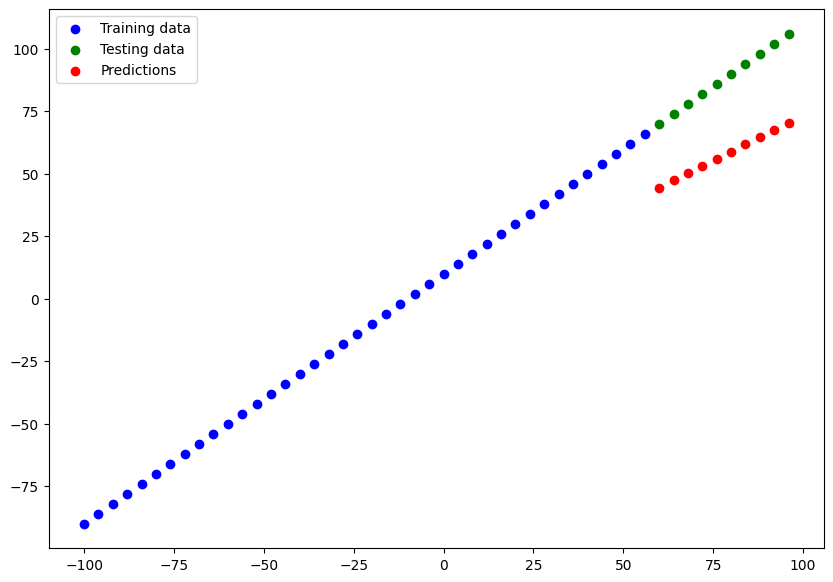

In [52]:
# make and plot predictions for model 1
y_preds_1 = model_1.predict(X_test)
plot_predictions(X_train,y_train,X_test,y_test,y_preds_1)

In [53]:
mae_1= mean_absolute_error(y_test,y_preds_1)
mse_1= mean_squared_error(y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.59231>,
 <tf.Tensor: shape=(), dtype=float32, numpy=946.28534>)

In [54]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mse"])
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 25.9101 - mse: 1361.8167
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 24.1031 - mse: 870.8172
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 28.9998 - mse: 1250.1439
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 15.8273 - mse: 374.5493
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 21.8704 - mse: 697.1130
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 11.2664 - mse: 141.7148
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 12.3264 - mse: 195.9184
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.0030 - mse: 140.6870
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 38.9005 - mse: 2352.5024
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 26.4963 - mse: 986.7132
Epoch 11/100
2/2 [=======================

1/1 [==============================] - 0s 90ms/step


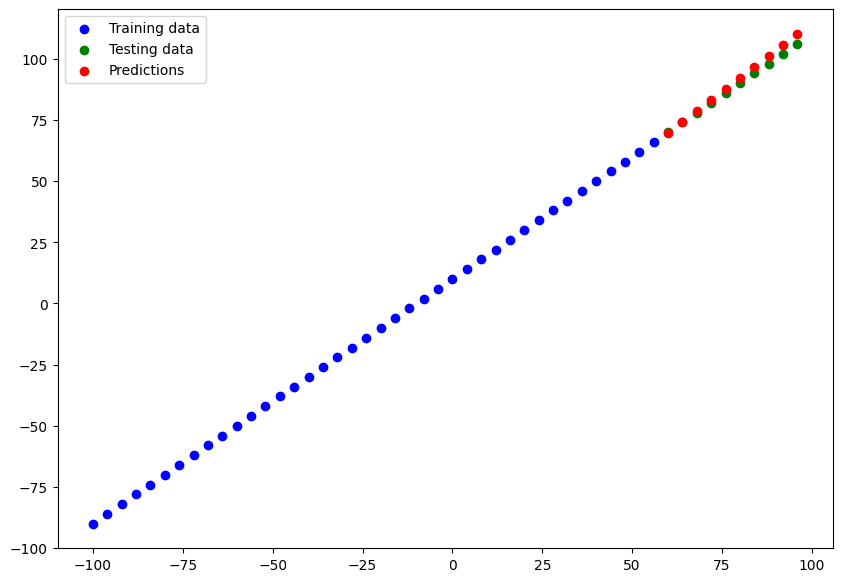

In [55]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(X_train,y_train,X_test,y_test,y_preds_2)

In [56]:
# calculate model 2 evaluation metrics
mae_2 = mean_absolute_error(y_test,y_preds_2)
mse_2 = mean_squared_error(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.943393>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.636037>)

In [57]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mse"])
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 11ms/step - loss: 53.2015 - mse: 4429.1763
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 29.1878 - mse: 1117.0981
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 34.1605 - mse: 1755.9069
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 28.0158 - mse: 1153.7607
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 15.2406 - mse: 295.5694
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 12.1075 - mse: 179.7332
Epoch 7/500
2/2 [==============================] - 0s 11ms/step - loss: 11.4147 - mse: 158.1987
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.1834 - mse: 171.8015
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 41.5690 - mse: 2749.4214
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 28.8225 - mse: 1173.6039
Epoch 11/500
2/2 [=======================

1/1 [==============================] - 0s 131ms/step


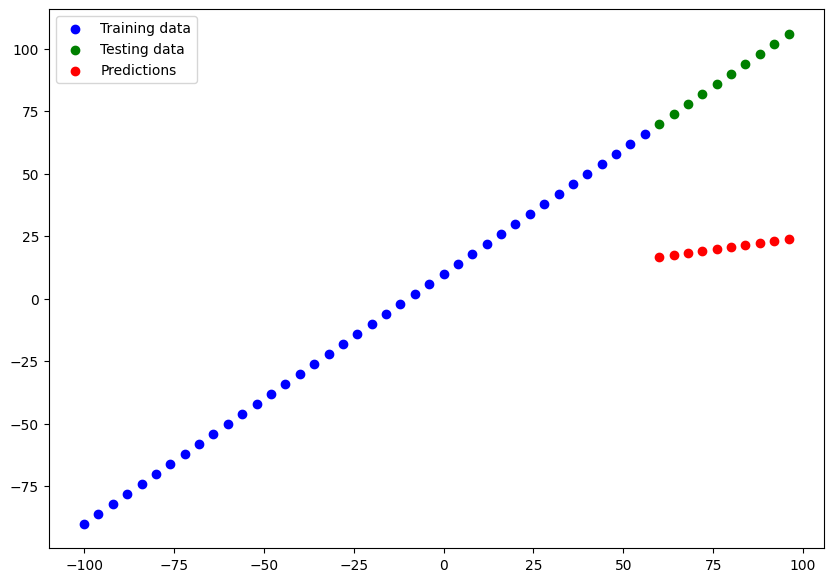

In [58]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(X_train,y_train,X_test,y_test,y_preds_3)

In [59]:
# calculate model 2 evaluation metrics
mae_3 = mean_absolute_error(y_test,y_preds_3)
mse_3 = mean_squared_error(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.58947>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4652.332>)

**Note** You want to start with small experiments - start with small models then scale


### Comparing results of our experiments

We've run a few experiments let's compare the results

In [60]:
import pandas as pd
model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],["model_2",mae_2.numpy(),mse_2.numpy()],["model_3",mae_3.numpy(),mse_3.numpy()]]
all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,30.592310,946.285339
1,model_2,1.943393,5.636037
2,model_3,67.589470,4652.332031


``Looks like model 1 performed the best``

In [61]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The mode experiments you do the more things you'll figure out which don't work and you'll get closer to what does work.  Remember: experiment,experiment,experiment.

## Tracking your experiements

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:

* Tensorboard - a component of the Tensorflow library to help track modelling experiments(will use later in course)
* Weights & Biases - a tool for tracking all kinds of ML experiments

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as a web application or a mobile application

There are two main formats we can save our model's as:

1. Saved model format
2. The HD5 format

In [62]:
model_1.save('./model_1')
!pwd

/content


In [63]:
model_1.save('./model_1.hdf5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Loading in a saved model

In [64]:
loaded_saved_model = tf.keras.models.load_model('./model_1')
loaded_saved_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
model_preds = loaded_saved_model.predict(X_test)

1/1 [==============================] - 0s 71ms/step


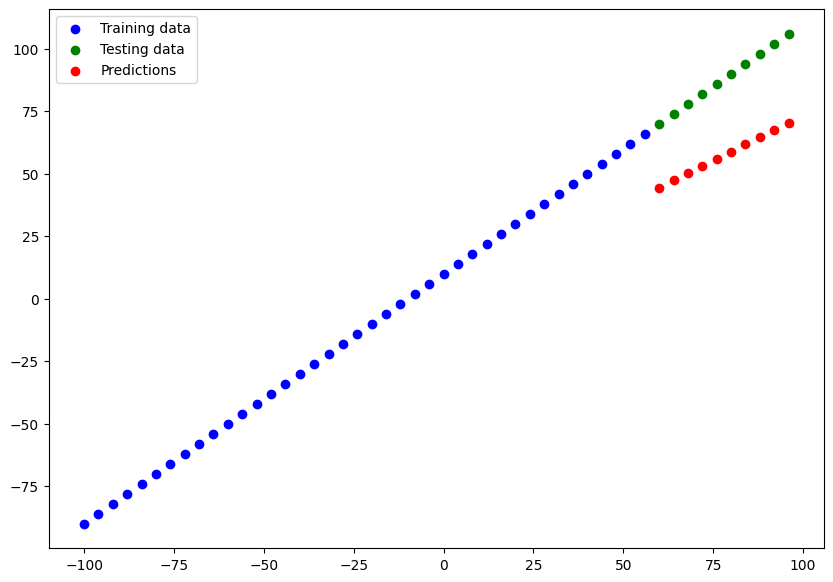

In [67]:
plot_predictions(X_train,y_train,X_test,y_test,model_preds)

In [68]:
y_preds_1 == model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [69]:
mean_absolute_error(y_true=y_test,y_pred=y_preds_1) == mean_absolute_error(y_true= y_test, y_pred = model_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [70]:
model_preds

array([[44.459187],
       [47.33663 ],
       [50.214077],
       [53.091522],
       [55.968967],
       [58.846413],
       [61.72386 ],
       [64.6013  ],
       [67.47875 ],
       [70.3562  ]], dtype=float32)

In [71]:
y_preds_1

array([[44.459187],
       [47.33663 ],
       [50.214077],
       [53.091522],
       [55.968967],
       [58.846413],
       [61.72386 ],
       [64.6013  ],
       [67.47875 ],
       [70.3562  ]], dtype=float32)

In [72]:
# load model using h5

loaded_h5_model = tf.keras.models.load_model('./model_1.hdf5')
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
model_preds_hdf5 = loaded_h5_model.predict(X_test)

1/1 [==============================] - 0s 50ms/step


In [75]:
model_preds_hdf5 == y_preds_1

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file from Google Colab)

If you want to download your files from Colab:

1. Go to files tab and click download within Colab
2. run files.download
3. Save to google drive - mount drive and save to that file path

In [76]:
from google.colab import files
files.download("./model_1.hdf5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
!cp -r /content/model_1 /content/drive/MyDrive

### A larger example

In [78]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
# import in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [80]:
insurance["smoker"],insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [81]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [82]:
# Create X and Y values(features and lables)
# Create training and test sets
# build a neural network
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]
X.head()


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [83]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [84]:
# Creating training and test sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [85]:
0.2 * 1338

267.6

In [86]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [116]:
# Build a neural network (like model 2)
tf.random.set_seed(42)

# create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(11),
    tf.keras.layers.Dense(1)
])
# compile model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# fit the model
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8624.8867 - mae: 8624.8867
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7846.6514 - mae: 7846.6514
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7609.2012 - mae: 7609.2012
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7809.1064 - mae: 7809.1064
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7659.3589 - mae: 7659.3589
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7662.3540 - mae: 7662.3540
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7671.5977 - mae: 7671.5977
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7751.9907 - mae: 7751.9907
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7515.9570 - mae: 7515.9570
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7728.9229 - mae: 7728.9229

In [117]:
# check the results of insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 5ms/step - loss: 8617.5420 - mae: 8617.5420


[8617.5419921875, 8617.5419921875]

In [94]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well let's try and improve it!

To try and improve our model we'll run 2 experiments:

1. Add an extra layer with more hidden units and use adam
2. Train for longer
3. Try different optimizers, learning_rate, and epochs

In [109]:
# set random seed
tf.random.set_seed(42)

# create the model
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
insurance_model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13294.8271 - mae: 13294.8271
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13128.5762 - mae: 13128.5762
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12770.8096 - mae: 12770.8096
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12063.3867 - mae: 12063.3867
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 10885.3154 - mae: 10885.3154
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 9404.6211 - mae: 9404.6211
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 8091.3755 - mae: 8091.3755
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7499.4326 - mae: 7499.4326
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7410.8926 - mae: 7410.8926
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7391.3613 - mae:

In [110]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4822.6147 - mae: 4822.6147


[4822.61474609375, 4822.61474609375]

In [113]:
# set random seed
tf.random.set_seed(42)

# create the model
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
history = insurance_model_3.fit(X_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 4ms/step - loss: 13320.7910 - mae: 13320.7910
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13210.6113 - mae: 13210.6113
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 12970.3584 - mae: 12970.3584
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12457.3525 - mae: 12457.3525
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 11511.7432 - mae: 11511.7432
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 10123.0088 - mae: 10123.0088
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 8638.6865 - mae: 8638.6865
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7681.8853 - mae: 7681.8853
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7451.2739 - mae: 7451.2739
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7424.6919 - ma

In [114]:
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3505.9998 - mae: 3505.9998


[3505.999755859375, 3505.999755859375]

In [118]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8617.5420 - mae: 8617.5420


[8617.5419921875, 8617.5419921875]

Text(0.5, 0, 'epochs')

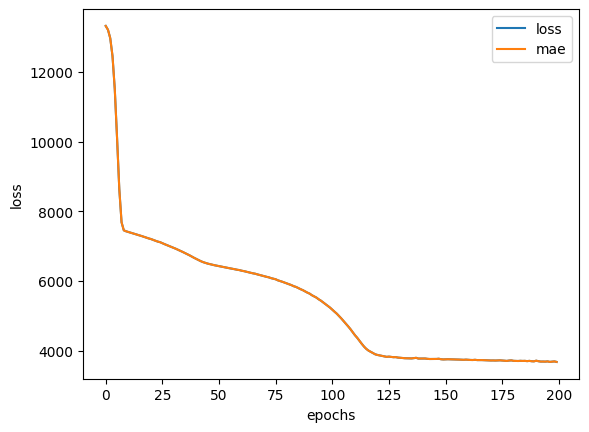

In [119]:
# Plot history(also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on.  However, many people have asked this question before... so Tensorflow has a solution! It's called the early stopping callback!  Early stopping is a Tensorflow component you can add to your model to stop training once it stops improving a certain metric.

In [120]:
# Build a neural network (like model 2)
tf.random.set_seed(42)

# create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(11,activation="linear"),
    tf.keras.layers.Dense(50,activation="linear"),
    tf.keras.layers.Dense(50,activation="linear"),
    tf.keras.layers.Dense(1,activation="linear")
])
# compile model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])
# fit the model
insurance_model.fit(X_train,y_train,epochs=500)

Epoch 1/500
34/34 [==============================] - 2s 2ms/step - loss: 9632.1953 - mae: 9632.1953
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 7394.2578 - mae: 7394.2578
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 7155.6948 - mae: 7155.6948
Epoch 4/500
34/34 [==============================] - 0s 2ms/step - loss: 6820.6606 - mae: 6820.6606
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 6516.6357 - mae: 6516.6357
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 6357.0469 - mae: 6357.0469
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 6190.6714 - mae: 6190.6714
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 5856.2031 - mae: 5856.2031
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 5367.9707 - mae: 5367.9707
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 4220.5786 - mae: 4220.5786

## Preprocessing data (Normalization and Standardization)